In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [22]:

    # Load the dataset
    train=pd.read_csv(r'C:\Users\Marwa\Desktop\train.csv')
    
    # Display the first few rows of the dataframe
    print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [23]:
test=pd.read_csv(r'C:\Users\Marwa\Desktop\test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [25]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)


% of men who survived: 0.18890814558058924


In [26]:
train.shape

(891, 12)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [29]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
# Handling missing values
# Fill missing Age values with the median age
train['Age'].fillna(train['Age'].median(), inplace=True)

In [31]:
# Fill missing Embarked values with the mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [32]:
# Drop the Cabin column as it has too many missing values
train.drop(columns=['Cabin'], inplace=True)

In [33]:
# Verify that there are no more missing values
print("Missing values after cleaning:\n", train.isnull().sum())

Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


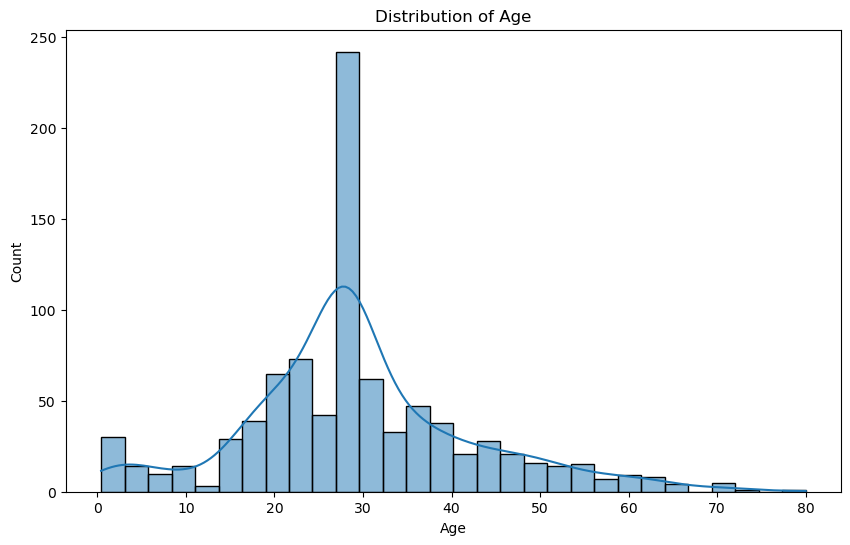

In [34]:
# Univariate Analysis
# Plot the distribution of the 'Age' column
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.show()

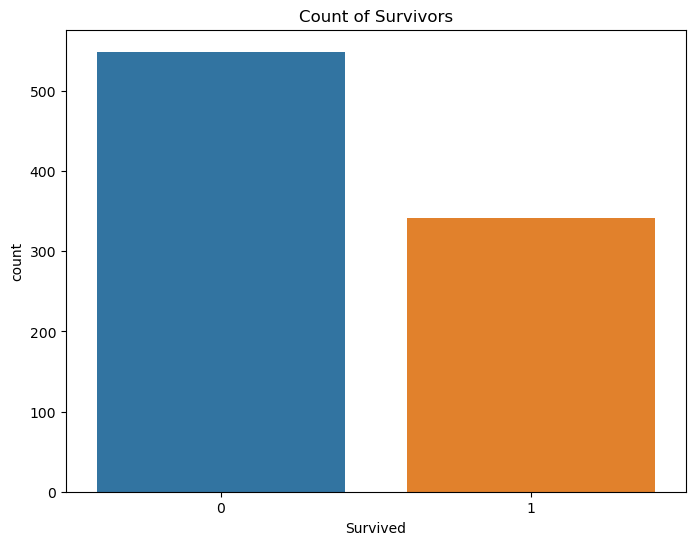

In [35]:
# Plot the count of survivors
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=train)
plt.title('Count of Survivors')
plt.show()


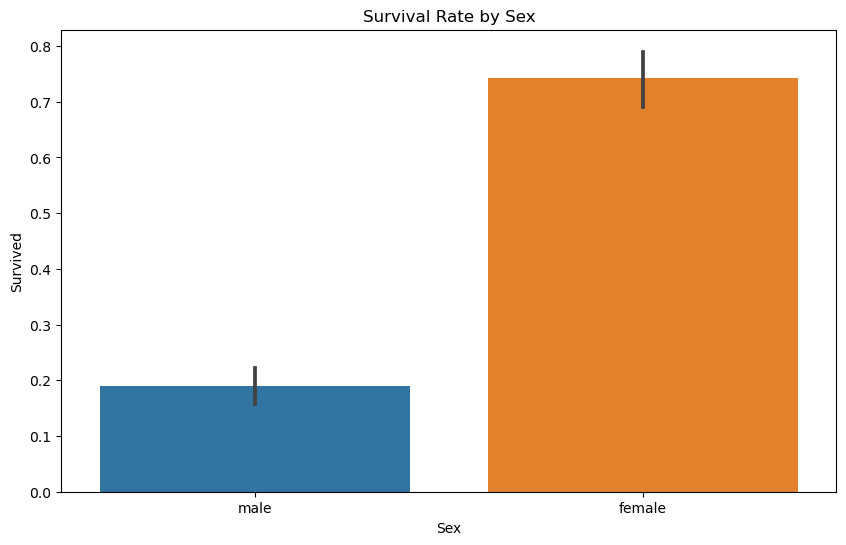

In [36]:
# Bivariate Analysis
# Plot survival rate by sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Sex')
plt.show()

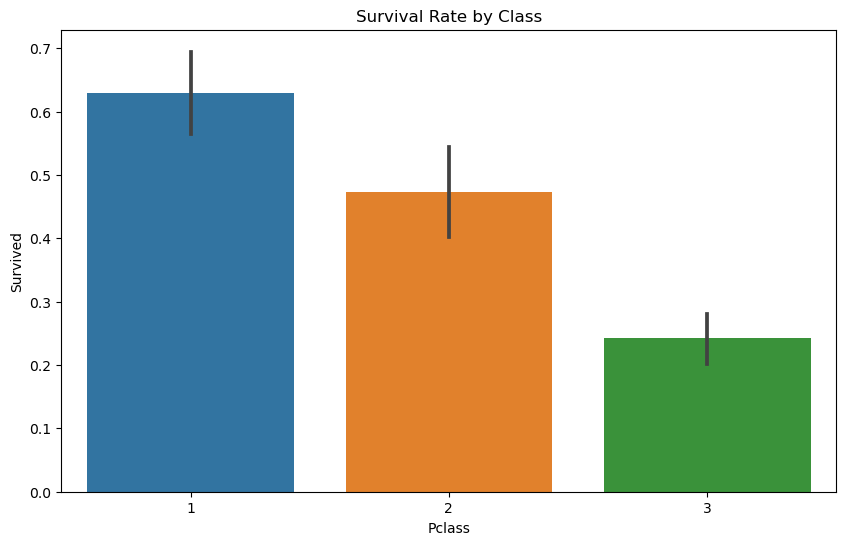

In [37]:
# Plot survival rate by class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Class')
plt.show()

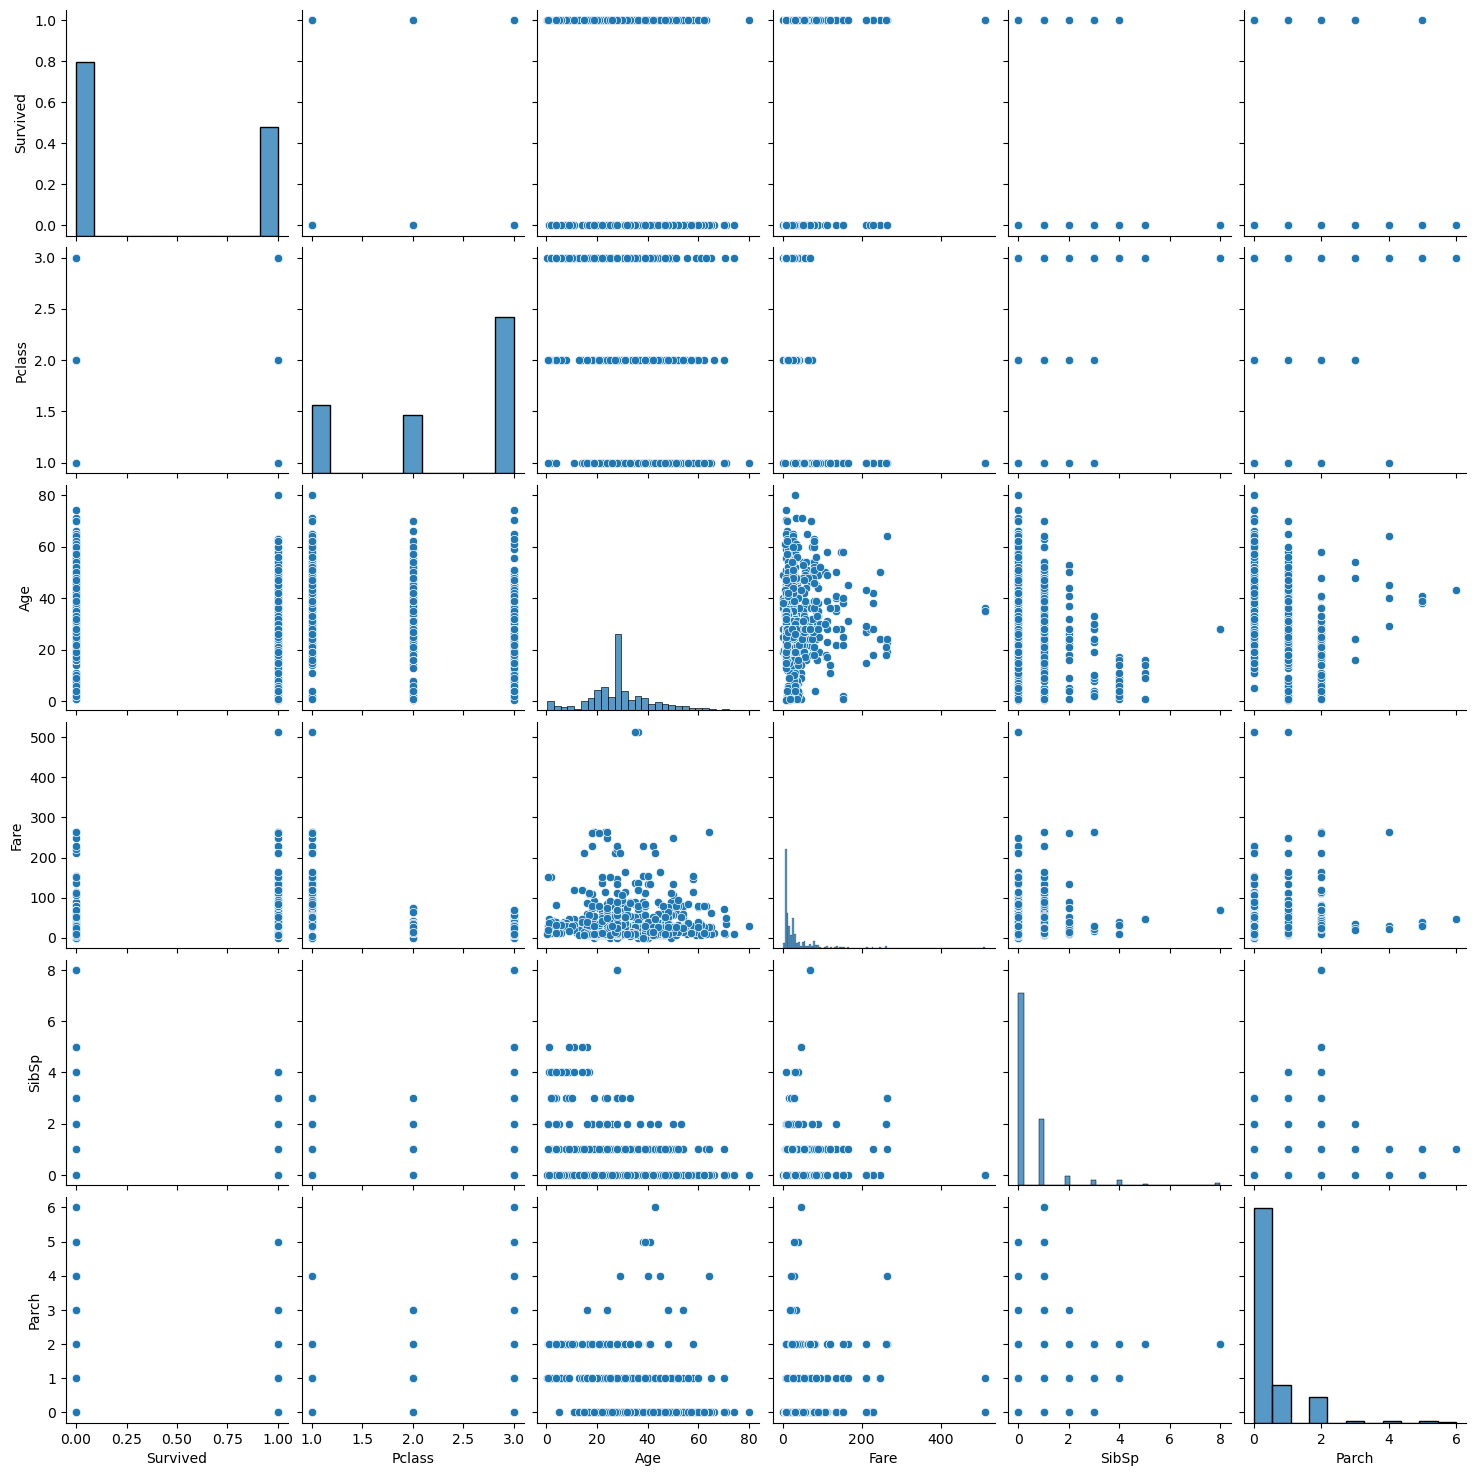

In [38]:
# Multivariate Analysis
# Pairplot to see relationships between multiple variables
sns.pairplot(train[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']])
plt.show()


C:\Users\Marwa\AppData\Local\Temp\ipykernel_8080\2545784207.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap='coolwarm')


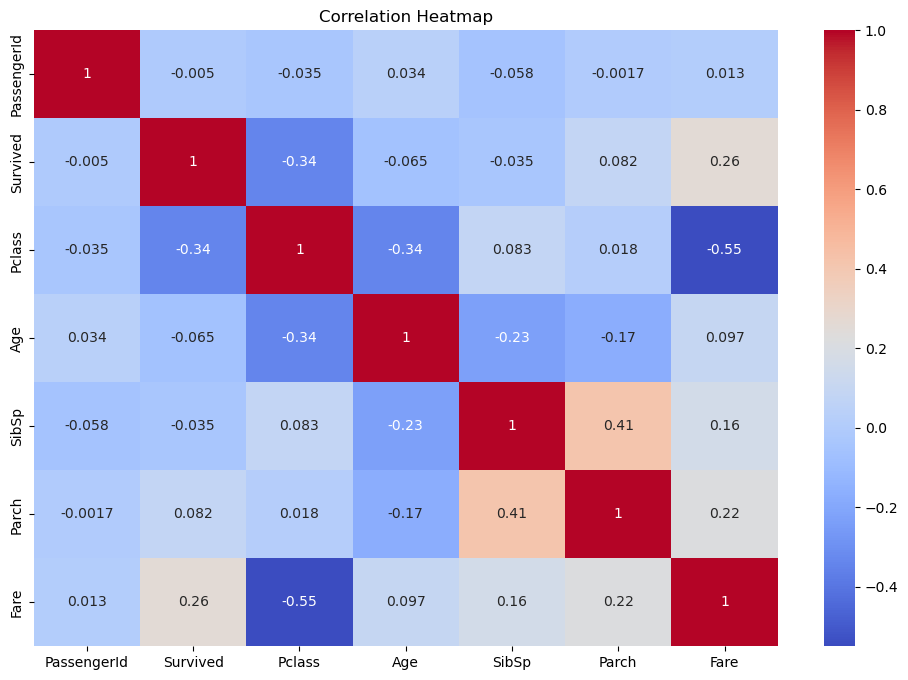

In [39]:
# Heatmap to see correlation between variables
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [46]:
# Step 2: Preprocess the data
# Encode categorical variables
label_encoders = {}
for column in train.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    train[column] = label_encoders[column].fit_transform(train[column])


In [51]:
# Separate features and target
X = train.drop('Survived', axis=1)
y = train['Survived']


In [52]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
# Step 4: Build the decision tree classifier
classifier = DecisionTreeClassifier(random_state=42)

In [54]:
# Step 5: Train the classifier
classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [55]:
# Step 6: Evaluate the model
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [56]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.77
Precision: 0.73
Recall: 0.72
F1 Score: 0.72


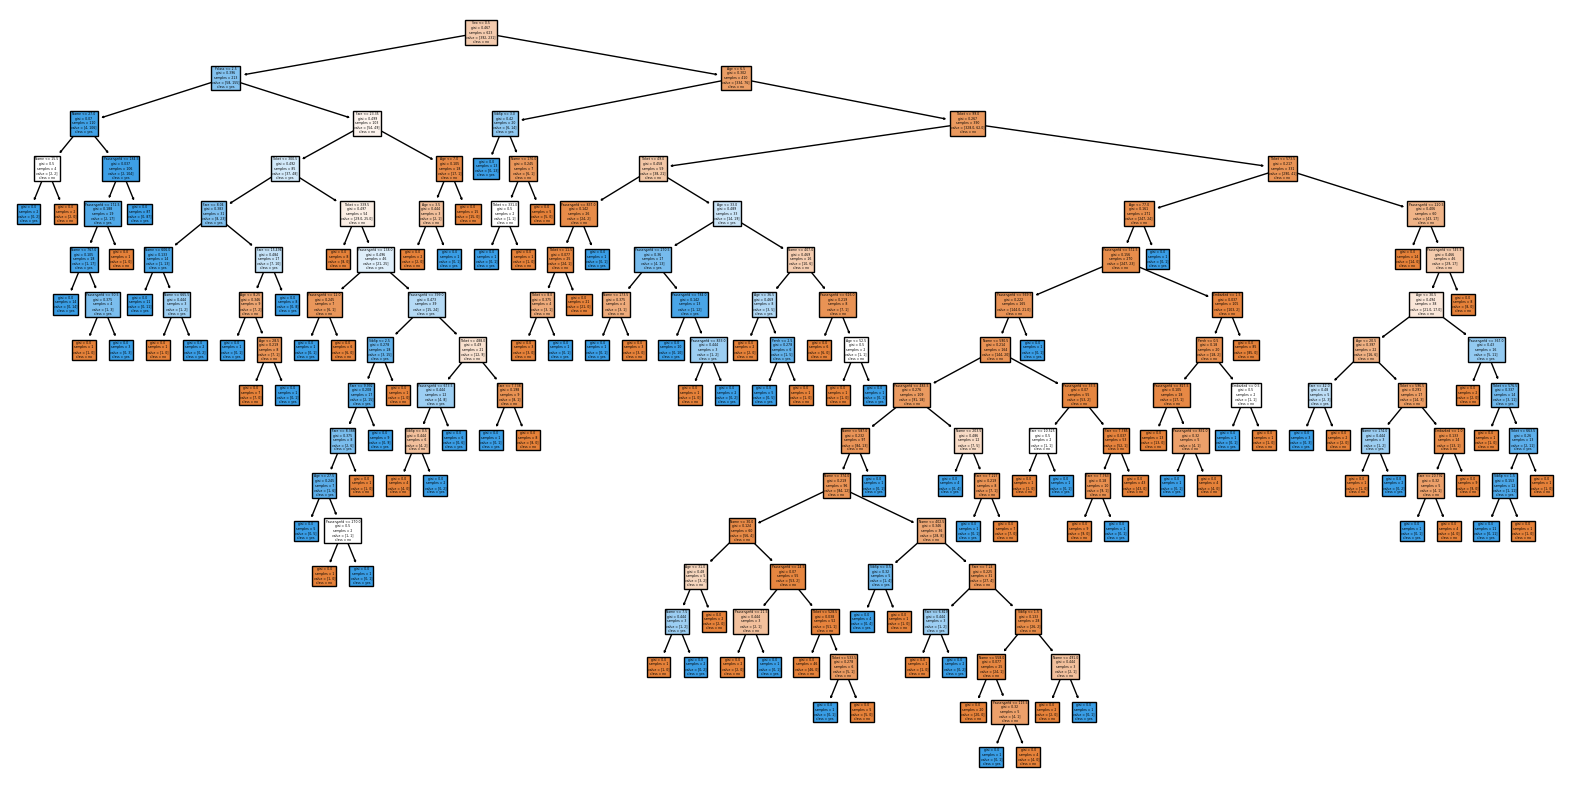

In [57]:
# Step 7: Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(classifier, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()